<a href="https://colab.research.google.com/github/KKAS-star/aed_projeto_2/blob/master/Projeto_2_Classificador_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

Forest covertypes - https://archive.ics.uci.edu/ml/datasets/Covertype -
previsão do tipo de cobertura florestal a partir de variáveis cartográficas.

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados

- Conversão do tipo de dados.


- Quais são minhas features?

Name / Data Type / Measurement / Description

- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

- Quais são minhas classes?

- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

- Como estão distribuidas minhas classes?



In [0]:
# BIBLIOTECAS DATA SCIENCE
import pandas as pd
import numpy as np

# Importando o módulo train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Usando o módulo Random Foresr para chamar o classificador
from sklearn.ensemble import RandomForestClassifier

#Avaliando o resultado: Cross validation
from sklearn.model_selection import cross_val_score

# Técnica de redução da dimensionalidade: PCA
from sklearn.decomposition import PCA

# Técnica de normalização
from sklearn.preprocessing import MinMaxScaler

#GridSearch
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

#MLP
from sklearn.neural_network import MLPClassifier

# BIBLIOTECAS DE PLOT
import matplotlib.pyplot as plt 

In [10]:
 # OBS.: O TRECHO DE CÓDIGO ABAIXO SÓ É NECESSÁRIO REALIZAR SE ESTIVER USANDO O AMBIENTE DO GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = "/content/drive/My Drive/POS IA/PROJETO_02/covtype.data"

Mounted at /content/drive


In [0]:
df = pd.read_csv(arquivo_base, header=None)

In [0]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [0]:
df[54].value_counts() / df.shape[0]

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: 54, dtype: float64

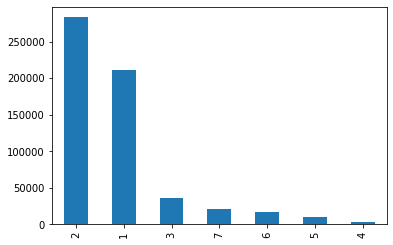

In [0]:
df[54].value_counts(dropna=False).plot(kind="bar")



- Checagem se os valores estão dentro de um limite permitido ou razoável.



In [0]:
# qual o tamanho da nossa base?
print('Número de linhas e número de colunas:', df.shape)

Número de linhas e número de colunas: (581012, 55)


In [0]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54],
           dtype='int64')

In [0]:
#Informações estatísticas da base de dados
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
# Verificação, com o uso do método isnull(), de valores faltantes ou nulos 
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [0]:
#Separando a coluna que contém o lable ("Cover Type")
df[54]
y = df[54]
x = df
x.drop(columns = 54,inplace=True,axis=1)

In [0]:
df.shape

(581012, 54)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

Random Forest

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
# Usando o módulo Random Forest para chamar o classificador.
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [0]:
# Treinando o modelo com os dados de Treino
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Testando o modelo
predictions = clf.predict(X_test)

In [0]:
#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))

Acuracia de  0.95


In [0]:
#Avaliando o resultado: cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do cross validation
print("Cross-validated scores", round(scores.mean(), 2))

Cross-validated scores [0.62620586 0.55141434 0.55031755 0.5995766  0.63784616]
Cross-validated scores 0.59


#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
# Técnica de redução da dimensionalidade: PCA

pca = PCA(n_components=50)
pca.fit(x)
x = pca.transform(x)

In [0]:
print(x)

In [0]:
# Técnica de normalização

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [0]:
print(x)

In [0]:
# Usando o módulo Random Forest para chamar o classificador.
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Treinando o modelo com os dados de Treino
clf.fit(X_train, y_train)

# Testando o modelo
predictions = clf.predict(X_test)

#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))


Acuracia de  0.95


In [0]:
#Avaliando o resultado: cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do cross validation
print("Cross-validated scores", round(scores.mean(), 2))

Cross-validated scores [0.60376238 0.51683691 0.52842464 0.59887954 0.65029862]
Cross-validated scores 0.58


#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# GridSearchCV
# Tipo de classificador: RandomForestClassifier
clf = RandomForestClassifier()

In [0]:
# Escolha dos parâmetros combinados
parameters = {'n_estimators': [10, 100, 200], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],         
             }

In [0]:
# Tipo de scoring usado para comparar os parâmetros combinados
acc_scorer = make_scorer(accuracy_score)

In [0]:
# Rodando o grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x, y)

In [0]:
# Isolando no "clf" a melhor combinação de parâmetros
clf_best = grid_obj.best_estimator_
clf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Aplicando o melhor algoritmo aos dados. 
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Usando o módulo Random Forest para chamar o classificador. O modelo foi instanciado com 100 decision trees
clf = RandomForestClassifier(n_estimators = 200, max_features='log2', criterion='gini', random_state = 42)

# Treinando o modelo com os dados de Treino
clf.fit(X_train, y_train)

# Testando o modelo
predictions = clf.predict(X_test)

#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))

Acuracia de  0.95


In [0]:
#Avaliando o resultado: cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do cross validation
print("Cross-validated scores", round(scores.mean(), 2))

Cross-validated scores [0.60376238 0.51683691 0.52842464 0.59887954 0.65029862]
Cross-validated scores 0.58


#### 3.5) Qual método escolhido?

MLP - Multilayer Perceptron

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Usando o módulo MLPClassifier para chamar o MLPClassifier.
clf2 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)

# Treinando o modelo com os dados de Treino
clf2.fit(X_train, y_train.values.ravel())

# Testando o modelo
predictions = clf2.predict(X_test)

#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Acuracia de  0.91


In [0]:
#Avaliando o resultado: Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do crossvalidation
print("Cross-validated scores", round(scores.mean(), 2))

Cross-validated scores [0.68439985 0.57041066 0.69322387 0.62692553 0.49439769 0.62482573
 0.62140066 0.59160772 0.58155626 0.67873186]
Cross-validated scores 0.62


#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [0]:
# Técnica de redução da dimensionalidade: PCA

pca = PCA(n_components=40)
pca.fit(x)
x = pca.transform(x)

In [0]:
# Técnica de normalização

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(x)
transformer
Normalizer()
transformer.transform(x)

array([[-0.12783922,  0.11720352, -0.09634863, ..., -0.01366609,
         0.00229438,  0.02328137],
       [-0.10517024,  0.09401435, -0.09136522, ..., -0.01303377,
         0.00146352,  0.02404386],
       [ 0.08317417,  0.49803706,  0.06107452, ..., -0.00932955,
         0.00486876,  0.00470699],
       ...,
       [ 0.00133128, -0.32506202, -0.08293022, ..., -0.00610722,
        -0.02760379,  0.0012812 ],
       [ 0.03666149, -0.32514876, -0.08431147, ..., -0.00558664,
        -0.02837954,  0.00175501],
       [ 0.02411328, -0.32721259, -0.08509732, ..., -0.00488578,
        -0.0287259 ,  0.00245623]])

In [0]:
# Usando o módulo MLPClassifier para chamar o MLPClassifier.
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)

# Treinando o modelo com os dados de Treino
clf.fit(X_train, y_train.values.ravel())

# Testando o modelo
predictions = clf.predict(X_test)

#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Acuracia de  0.92


In [19]:
#Avaliando o resultado: Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do crossvalidation
print("Cross-validated scores", round(scores.mean(), 2))

Cross-validated scores [0.52820495 0.54444378 0.46444984 0.54536067 0.56376827]
Cross-validated scores 0.53


#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [17]:
# GridSearchCV
# Tipo de classificador: RandomForestClassifier
clf = MLPClassifier()

# Escolha dos parâmetros combinados
parameters = {'max_fun': [10, 20, 50], 
              'max_iter': [10, 20, 50],                    
             }

# Tipo de scoring usado para comparar os parâmetros combinados
acc_scorer = make_scorer(accuracy_score)

# Rodando o grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x, y)

# Isolando no "clf" a melhor combinação de parâmetros
clf_best = grid_obj.best_estimator_
clf_best

# Aplicando o melhor algoritmo aos dados. 
clf.fit(x, y)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
#separa os dados em set de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Usando o módulo MLPClassifier para chamar o classificador.
clf2 = MLPClassifier(max_fun = 50, max_iter = 50, random_state = 42)

# Treinando o modelo com os dados de Treino
clf.fit(X_train, y_train)

# Testando o modelo
predictions = clf.predict(X_test)

#Avaliando o resultado: acuracia.
acuracia = accuracy_score(predictions, y_test)
print("Acuracia de ", round(float(acuracia), 2))



Acuracia de  0.78


In [0]:
#Avaliando o resultado: Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print("Cross-validated scores", scores)

#Média dos scores do crossvalidation
print("Cross-validated scores", round(scores.mean(), 2))

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

RandomForestClassifier: Acuracia de  0.95 e Cross-validated scores 0.59

MLPClassifier: Acuracia de  0.91 e Cross-validated scores 0.62

Caso a solução fosse para produção, eu escolheria o MLPClassifier, pois, apesar de sua acurácia ter apresentado resultado menor que do modelo RandomForestClassifier, seu Cross-validated foi maior, o que evidencia sua performace em produção seria ligeiramente superior.
Contudo, considerando a considerável diferença entre os scores da acurácia e Cross-validated, em ambos os modelos, o que evidencia a existência de overfit, seria temerário aplicar em produção qualquer dos modelos em produção, pois ainda não apresentam desempenho satisfatório.
Para a melhora dos resultados, o recomendável seria a aplicação de outras técnicas de pre-processamento dos dados, além observância de outros hiperparâmetros no GridSearchCV.